WorkFlow ====>
        Spliting Datasets(Training Set / Testing Set)
            ||
        Data Exploration and Visualisation
            ||
        Feature Extraction and Feature Engineering
            ||
        Data Modelling and Machine Learning

# Spliting Datasets(Training Set / Testing Set)

The cell block below  randomly splits the datasets into training(85%) and testing (15%) sets locally 

In [31]:
import random                    # Splitted dataset into two 85 / 15

with open('/Users/abayomi/Desktop/walmart/census-income.data') as data:
    with open('/Users/abayomi/Desktop/walmart/train.data', 'w') as test:
        with open('/Users/abayomi/Desktop/walmart/test.data', 'w') as train:
            header = next(data)
            test.write(header)
            train.write(header)
            for line in data:
                if random.random() > 0.85:
                    train.write(line)
                else:
                    test.write(line)

# Data Exploration and Visualisation

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


names = ['age', 
'ACLSWKR', # class of worker ACLSWKR
'ADTIND', # industry code ADTIND
'ADTOCC', # occupation code ADTOCC
'AHGA', # education AHGA
'AHRSPAY', # wage per hour AHRSPAY
'AHSCOL',# enrolled in edu inst last wk AHSCOL
'AMARITL', # marital status AMARITL
'AMJIND',# major industry code AMJIND
'AMJOCC',# major occupation code AMJOCC
'ARACE',# mace ARACE
'AREORGN',# hispanic Origin AREORGN
'ASEX',# sex ASEX
'AUNMEM',# member of a labor union AUNMEM
'AUNTYPE',# reason for unemployment AUNTYPE
'AWKSTAT',# full or part time employment stat AWKSTAT
'CAPGAIN', # capital gains CAPGAIN
'CAPLOSS',# capital losses CAPLOSS
'DIVVAL', # divdends from stocks DIVVAL
'FILESTAT', # tax filer status FILESTAT
'GRINREG', # region of previous residence GRINREG
'GRINST',# state of previous residence GRINST
'HHDFMX', # detailed household and family stat HHDFMX
'HHDREL',# detailed household summary in household HHDREL
'MIGMTR1', # migration code-change in msa MIGMTR1
'MIGMTR3', # migration code-change in reg MIGMTR3
'MIGMTR4', # migration code-move within reg MIGMTR4
'MIGSAME',# live in this house 1 year ago MIGSAME
'MIGSUN',# migration prev res in sunbelt MIGSUN
'NOEMP',# num persons worked for employer NOEMP
'PARENT',# family members under 18 PARENT
'PEFNTVTY',# country of birth father PEFNTVTY
'PEMNTVTY',# country of birth mother PEMNTVTY
'PENATVTY', # country of birth self PENATVTY
'PRCITSHP',# citizenship PRCITSHP
'SEOTR', # own business or self employed SEOTR
'TAXINC',# taxable income amount TAXINC
'VETQVA',# fill inc questionnaire for veterans admin VETQVA
'VETYN', # veterans benefits VETYN
'WKSWORK', # weeks worked in year WKSWORK
'MARSUPWT', # instance weight MARSUPWT
'TARGET', # gross income target TARGET
]
data = pd.read_csv("/Users/abayomi/Desktop/walmart/census-income.data",names=names)

data.head()

,age,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,TAXINC,VETQVA,VETYN,WKSWORK,MARSUPWT,TARGET
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


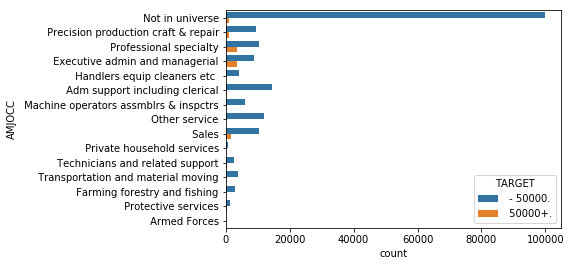

In [25]:
# Direct indicators the can influece income (TARGET) are AMJOCC - occupation and AHGA - Education

sns.countplot(y='AMJOCC', hue='TARGET', data=data,)  # Occupation 
plt.show()

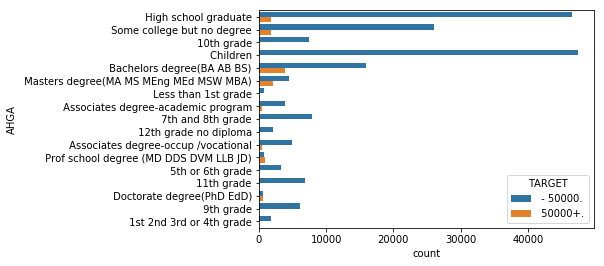

In [24]:

sns.countplot(y='AHGA', hue='TARGET', data=data,)  # Education
plt.show()

# Feature Extraction and Feature Engineering

In [26]:
import json

meta = {
    'target_names': list(data.TARGET.unique()),
    'feature_names': list(data.columns),
    'categorical_features': {
        column: list(data[column].unique())
        for column in data.columns
        if data[column].dtype == 'object'
    },
}
with open('/Users/abayomi/Desktop/walmart/meta.json', 'w') as f:
    json.dump(meta, f, indent=2)

In [34]:
import os
from sklearn.datasets.base import Bunch

def load_data(root='/Users/abayomi/Desktop/walmart/'):
    # Load the meta data from the file
    with open(os.path.join(root, 'meta.json'), 'r') as f:
        meta = json.load(f)
    names = meta['feature_names']
    # Load the readme information
#     with open(os.path.join(root, 'README.md'), 'r') as f:
#         readme = f.read()
    # Load the training and test data, skipping the bad row in the test data
    train = pd.read_csv(os.path.join(root, 'train.data'), names=names)
    test  = pd.read_csv(os.path.join(root, 'test.data'), names=names, skiprows=1)
    
    # Remove the target from the categorical features
    meta['categorical_features'].pop('TARGET')
    # Return the bunch with the appropriate data chunked apart
    return Bunch(
        data = train[names[:-1]],
        target = train[names[-1]],
        data_test = test[names[:-1]],
        target_test = test[names[-1]],
        target_names = meta['target_names'],
        feature_names = meta['feature_names'],
        categorical_features = meta['categorical_features'],
#         DESCR = readme,
    )
dataset = load_data()

In [36]:
from sklearn.preprocessing import LabelEncoder
gender = LabelEncoder()
gender.fit(dataset.data.ASEX)
print(gender.classes_)

[' Female' ' Male']


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        return output
encoder = EncodeCategorical(dataset.categorical_features.keys())
data = encoder.fit_transform(dataset.data)

In [40]:
from sklearn.preprocessing import Imputer

class ImputeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.imputer = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to impute.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit an imputer for each column in the data frame
        self.imputer = Imputer(missing_values=0, strategy='most_frequent')
        self.imputer.fit(data[self.columns])
        return self
    
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        output[self.columns] = self.imputer.transform(output[self.columns])
        return output

imputer = ImputeCategorical(['GRINST','MIGMTR3','MIGMTR4','MIGSAME','NOEMP','PEMNTVTY','PENATVTY','PRCITSHP'])
data = imputer.fit_transform(data)

# Model Building

In [ ]:
Used 

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# we need to encode our target data as well.
yencode = LabelEncoder().fit(dataset.target)
# construct the pipeline
census = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(['GRINST','MIGMTR3','MIGMTR4','MIGSAME','NOEMP','PEMNTVTY','PENATVTY','PRCITSHP'])),
        ('classifier', LogisticRegression())
    ])
# fit the pipeline
census.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'ASEX', u'GRINST', u'AMARITL', u'MIGSAME', u'PEFNTVTY', u'HHDFMX', u'PRCITSHP', u'VETQVA', u'PEMNTVTY', u'MIGMTR3', u'AUNMEM', u'MIGMTR4', u'ARACE', u'ACLSWKR', u'HHDREL', u'NOEMP', u'FILESTAT', u'MIGSUN', u'AHSCOL', u'AMJIND', u'AREORGN', u'AUNTYPE', u...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Classification Report 

In [ ]:
Using Logsitic Regression Classifier 

In [43]:
from sklearn.metrics import classification_report
# encode test targets, and strip traililng '.'
y_true = yencode.transform([y.rstrip("-") for y in dataset.target_test])
# use the model to get the predicted value
y_pred = census.predict(dataset.data_test)
# execute classification report
print classification_report(y_true, y_pred, target_names=dataset.target_names)

             precision    recall  f1-score   support

   - 50000.       0.95      0.99      0.97     28087
    50000+.       0.69      0.27      0.39      1814

avg / total       0.94      0.95      0.94     29901



Model comparison using Support Vector Machine

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
# we need to encode our target data as well.
yencode = LabelEncoder().fit(dataset.target)
# construct the pipeline
census = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(['GRINST','MIGMTR3','MIGMTR4','MIGSAME','NOEMP','PEMNTVTY','PENATVTY','PRCITSHP'])),
        ('classifier', SVC())
    ])
# fit the pipeline
census.fit(dataset.data, yencode.transform(dataset.target))

Resources:

http://scikit-learn.org/stable/modules/compose.html
https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
https://medium.com/district-data-labs/building-a-classifier-from-census-data-18f996c4d7cf

Your personal use.
https://developers.google.com/machine-learning/crash-course/prereqs-and-prework

